In [1]:
# Install the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn import metrics
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving TSLA.csv to TSLA.csv


In [3]:
# Store the data into a frame
df = pd.read_csv("TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-09,855.119995,859.799988,841.750000,849.460022,849.460022,15157700
1,2021-02-10,843.640015,844.820007,800.020020,804.820007,804.820007,36216100
2,2021-02-11,812.440002,829.880005,801.729980,811.659973,811.659973,21622800
3,2021-02-12,801.260010,817.330017,785.330017,816.119995,816.119995,23768300
4,2021-02-16,818.000000,821.000000,792.440002,796.219971,796.219971,19802300


In [4]:
# Display last 5 stock prices
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
249,2022-02-03,882.000000,937.000000,880.520020,891.140015,891.140015,26285200
250,2022-02-04,897.219971,936.500000,881.169983,923.320007,923.320007,24472600
251,2022-02-07,923.789978,947.770020,902.710022,907.340027,907.340027,20331500
252,2022-02-08,905.530029,926.289978,894.799988,922.000000,922.000000,16909700
253,2022-02-09,935.000000,946.269897,922.090027,932.000000,932.000000,17058908


In [5]:
# Return the length of the list
len(df)

254

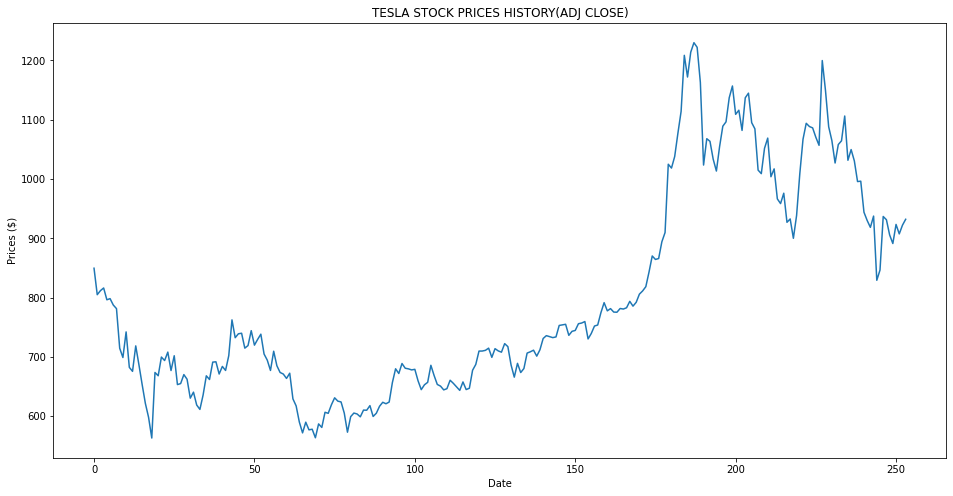

In [7]:
# Visualize historical stock price
plt.figure(figsize=(16, 8))
plt.title("TESLA STOCK PRICES HISTORY(ADJ CLOSE)")
plt.plot(df["Adj Close"])
plt.xlabel('Date')
plt.ylabel("Prices ($)")
plt.show()

In [8]:
# Create a dataframe that contains only the Adjusted Close Column
label_data = df.filter(["Adj Close"])
#Convert the data to a numpy array to train the model
values = label_data.values
# Splitt the dataset into trainig and set. 85% of the data is for training set
train_size = math.ceil(len(values) * 0.85)
train_size
normalizer = MinMaxScaler(feature_range=(0,1))
scaled_data = normalizer.fit_transform(values)
scaled_data

array([[4.29533231e-01],
       [3.62597644e-01],
       [3.72853849e-01],
       [3.79541441e-01],
       [3.49702297e-01],
       [3.52596320e-01],
       [3.36447187e-01],
       [3.27330490e-01],
       [2.27167072e-01],
       [2.03685685e-01],
       [2.68432039e-01],
       [1.78764698e-01],
       [1.68688420e-01],
       [2.33059911e-01],
       [1.85092435e-01],
       [1.35250645e-01],
       [8.76280143e-02],
       [5.24058872e-02],
       [0.00000000e+00],
       [1.65809497e-01],
       [1.57532490e-01],
       [2.04825192e-01],
       [1.96023411e-01],
       [2.17330666e-01],
       [1.70757672e-01],
       [2.08139016e-01],
       [1.35190608e-01],
       [1.37754705e-01],
       [1.60441431e-01],
       [1.48685682e-01],
       [1.00868208e-01],
       [1.16042661e-01],
       [8.35345386e-02],
       [7.24085342e-02],
       [1.08890242e-01],
       [1.57337553e-01],
       [1.48070947e-01],
       [1.92004890e-01],
       [1.92859589e-01],
       [1.61895856e-01],


In [9]:
# Create a dataframe thar contains the Adjusted Close stock prices in the last 60 days
train_data = scaled_data[0:train_size, :]
xtrain, ytrain = [], []

for i in range(60, len(train_data)):
    xtrain.append(train_data[i-60:i, 0])
    ytrain.append(train_data[i, 0])
xtrain, ytrain = np.array(xtrain), np.array(ytrain)
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))

In [10]:
# We build an LSTM models with 4 hidden layers
model = Sequential()

#Add the first LSTM layer and Dropout
model.add(LSTM(units = 50, return_sequences = True, input_shape = (xtrain.shape[1], 1)))
model.add(Dropout(0.2))

#Add the first LSTM layer and Dropout
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Add the third LSTM layer and Dropout 
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Add the LSTM layer and Dropout 
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units = 1))

# Compile the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = "accuracy")

# Fitt the RNN to the Training set
model.fit(xtrain, ytrain, epochs = 20, batch_size = 32)

Epoch 1/20
5/5 [==============================] - 8s 127ms/step - loss: 0.1500 - accuracy: 0.0000e+00
Epoch 2/20
5/5 [==============================] - 1s 127ms/step - loss: 0.0504 - accuracy: 0.0064
Epoch 3/20
5/5 [==============================] - 1s 122ms/step - loss: 0.0350 - accuracy: 0.0000e+00
Epoch 4/20
5/5 [==============================] - 1s 126ms/step - loss: 0.0370 - accuracy: 0.0000e+00
Epoch 5/20
5/5 [==============================] - 1s 120ms/step - loss: 0.0249 - accuracy: 0.0064
Epoch 6/20
5/5 [==============================] - 1s 129ms/step - loss: 0.0220 - accuracy: 0.0064
Epoch 7/20
5/5 [==============================] - 1s 127ms/step - loss: 0.0200 - accuracy: 0.0064
Epoch 8/20
5/5 [==============================] - 1s 120ms/step - loss: 0.0202 - accuracy: 0.0064
Epoch 9/20
5/5 [==============================] - 1s 124ms/step - loss: 0.0194 - accuracy: 0.0000e+00
Epoch 10/20
5/5 [==============================] - 1s 123ms/step - loss: 0.0169 - accuracy: 0.0000e+00

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [12]:
# Get the predicted stock price
test_data = scaled_data[train_size - 60: , : ]

xtest = []
ytest =  values[train_size : , : ]
for i in range(60,len(test_data)):
    xtest.append(test_data[i-60:i,0])

xtest = np.array(xtest)

#Reshape the data into the shape accepted by the LSTM
xtest = np.reshape(xtest, (xtest.shape[0],xtest.shape[1],1))

In [13]:
# Make predictions by using test dataset
predicted_stock_price = model.predict(xtest)
predicted_stock_price = normalizer.inverse_transform(predicted_stock_price)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


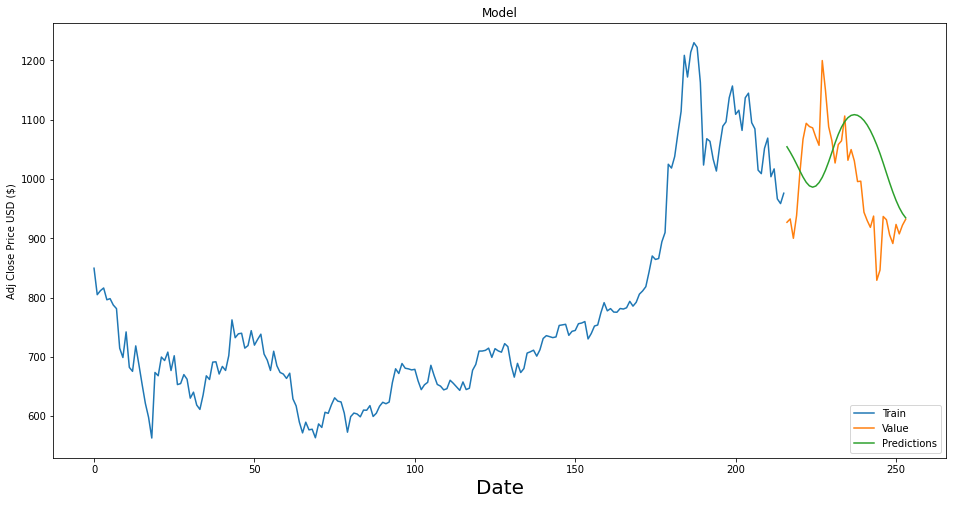

In [14]:
# Visualize the results
data = df.filter(['Adj Close'])
train = data[:train_size]
validation = data[train_size:]
validation['Predictions'] = predicted_stock_price
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Adj Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Value', 'Predictions'], loc="lower right")
plt.show()

In [15]:
# Calculate MAE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, predicted_stock_price))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, predicted_stock_price)))

Mean Absolute Error: 89.0704715203536
Root Mean Squared Error: 105.08888651695726
